<a href="https://colab.research.google.com/github/Annavrami/test1/blob/main/me2254.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score
from sklearn.linear_model import SGDClassifier

from imblearn.over_sampling import RandomOverSampler


from keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load iris dataset
iris = load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#split the dataset into a training set and a testing set
X = iris.drop(['target'], axis=1).to_numpy()
y = iris['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
#standardize the feature values in the training and testing sets.
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
# set number of batches and number of scans 
num_batches = [5,10, 20]
num_scans= [6,11, 21]

for batch in num_batches:
    for scan in num_scans:
        # Αρχικοποιούμε το μοντέλο
        svm_model = SGDClassifier(loss='hinge', alpha=0.001, learning_rate='constant', eta0=0.01,
                    max_iter=1000, average=30, n_iter_no_change=6)

        # Εκπαιδεύουμε το μοντέλο χρησιμοποιώντας mini-batch SGD
        n_samples = X_train.shape[0]
        for scan in range(scan):
            shuffled_indices = np.random.permutation(n_samples)
            for batch_start in range(0, n_samples, batch):
                batch_end = min(batch_start + batch, n_samples)
                batch_indices = shuffled_indices[batch_start:batch_end]
                X_batch = X_train[batch_indices]
                y_batch = y_train[batch_indices]
                svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

        # Προβλέπουμε τις ετικέτες του σετ ελέγχου
        y_pred = svm_model.predict(X_test)

        # Υπολογίζουμε την ακρίβεια, την προσέγγιση και το F1
        accuracy = svm_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Εκτύπωση αποτελεσμάτων
        print("ℓ = %d, T = %d, accuracy = %.3f, precision = %.3f, F1 = %.3f" % (batch, scan, accuracy, precision, f1))

ℓ = 5, T = 5, accuracy = 0.778, precision = 0.785, F1 = 0.781
ℓ = 5, T = 10, accuracy = 0.800, precision = 0.807, F1 = 0.803
ℓ = 5, T = 20, accuracy = 0.822, precision = 0.828, F1 = 0.824
ℓ = 10, T = 5, accuracy = 0.778, precision = 0.785, F1 = 0.781
ℓ = 10, T = 10, accuracy = 0.800, precision = 0.807, F1 = 0.803
ℓ = 10, T = 20, accuracy = 0.778, precision = 0.788, F1 = 0.781
ℓ = 20, T = 5, accuracy = 0.778, precision = 0.790, F1 = 0.773
ℓ = 20, T = 10, accuracy = 0.778, precision = 0.788, F1 = 0.781
ℓ = 20, T = 20, accuracy = 0.822, precision = 0.828, F1 = 0.824


**Breast Cancer**

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
         'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
         'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

breast_cancer = pd.read_csv(url, names=names).replace('?', np.nan).dropna()
breast_cancer["class"]=np.where(breast_cancer["class"]==4,1,-1)
breast_cancer.head(10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,-1
1,1002945,5,4,4,5,7,10,3,2,1,-1
2,1015425,3,1,1,1,2,2,3,1,1,-1
3,1016277,6,8,8,1,3,4,3,7,1,-1
4,1017023,4,1,1,3,2,1,3,1,1,-1
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,-1
7,1018561,2,1,2,1,2,1,3,1,1,-1
8,1033078,2,1,1,1,2,1,1,1,5,-1
9,1033078,4,2,1,1,2,1,2,1,1,-1


In [ ]:
X = breast_cancer.drop(['class'], axis=1).to_numpy()
y = breast_cancer['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
# Use the RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, f1_score

# Θέτουμε τους αριθμούς παρτίδων και σαρώσεων
num_batches = [5,10, 20]
num_scans= [5,10, 20]

for batch in num_batches:
    for scan in num_scans:
        # Αρχικοποιούμε το μοντέλο
        svm_model = SGDClassifier(loss='hinge', alpha=0.001, learning_rate='constant', eta0=0.01,
                    max_iter=1000, average=30, n_iter_no_change=6)

        # Εκπαιδεύουμε το μοντέλο χρησιμοποιώντας mini-batch SGD
        n_samples = X_train.shape[0]
        for scan in range(scan):
            shuffled_indices = np.random.permutation(n_samples)
            for batch_start in range(0, n_samples, batch):
                batch_end = min(batch_start + batch, n_samples)
                batch_indices = shuffled_indices[batch_start:batch_end]
                X_batch = X_train[batch_indices]
                y_batch = y_train[batch_indices]
                svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

        # Προβλέπουμε τις ετικέτες του σετ ελέγχου
        y_pred = svm_model.predict(X_test)

        # Υπολογίζουμε την ακρίβεια, την προσέγγιση και το F1
        accuracy = svm_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Εκτύπωση αποτελεσμάτων
        print("ℓ = %d, T = %d, accuracy = %.3f, precision = %.3f, F1 = %.3f" % (batch, scan, accuracy, precision, f1))

ℓ = 5, T = 4, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 5, T = 9, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 5, T = 19, accuracy = 0.976, precision = 0.976, F1 = 0.976
ℓ = 10, T = 4, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 10, T = 9, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 10, T = 19, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 20, T = 4, accuracy = 0.971, precision = 0.972, F1 = 0.971
ℓ = 20, T = 9, accuracy = 0.976, precision = 0.977, F1 = 0.976
ℓ = 20, T = 19, accuracy = 0.971, precision = 0.972, F1 = 0.971


2o Ερώτημα

# **Car**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import pandas as pd

# Load the Car Evaluation Data Set from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(url, header=None)

# Display first 5 rows of DataFrame
print(df.head())

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define column names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# create a label encoder object
label_encoder = LabelEncoder()

# Assign column names to DataFrame
df.columns = columns

# label encode the categorical columns
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

# print the first few rows of the encoded dataframe
print(df.head())

# print the shape of the encoded dataframe
df.shape

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


(1728, 7)

In [ ]:
# Set the first column as the target
X = df.drop('class', axis=1).to_numpy()
y = df['class'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [ ]:
# Use the RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Initialize the SVM model with hinge loss
svm_model = SGDClassifier(loss='hinge', alpha=0.001, learning_rate='constant', eta0=0.01,
                max_iter=1000, average=30, n_iter_no_change=6)

# Train the model using mini-batch SGD with ℓ = 1
n_samples = X_train.shape[0]
for scan in range(5):
    shuffled_indices = np.random.permutation(n_samples)
    for i in range(n_samples):
        batch_indices = shuffled_indices[i:i+1]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Predict the labels of the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model performance
accuracy = svm_model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("F1 Score: %.3f" % f1)


Accuracy: 0.713
Precision: 0.620
F1 Score: 0.635


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LOGISTIC REGRESSION**

In [ ]:
# Load the Car Evaluation Data Set from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(url, header=None)

from sklearn.preprocessing import LabelEncoder

# Define column names
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# create a label encoder object
label_encoder = LabelEncoder()

# Assign column names to DataFrame
df.columns = columns

# label encode the categorical columns
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

# print the first few rows of the encoded dataframe
print(df.head())

# print the shape of the encoded dataframe
print(df.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2
(1728, 7)
Accuracy: 0.665
Precision: 0.579
Recall: 0.665
F1 Score: 0.611


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# IT ONLY USED FOR TESTING 
## WINE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, f1_score

# Load the wine dataset from UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None)

# Rename the columns
columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
df.columns = columns

# Set the first column as the target
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the SVM model with hinge loss
svm_model = SGDClassifier(loss='hinge', alpha=0.001, learning_rate='constant', eta0=0.01,
                max_iter=1000, average=30, n_iter_no_change=6)

# Train the model using mini-batch SGD with ℓ = 1
n_samples = X_train.shape[0]
for scan in range(5):
    shuffled_indices = np.random.permutation(n_samples)
    for i in range(n_samples):
        batch_indices = shuffled_indices[i:i+1]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Predict the labels of the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model performance
accuracy = svm_model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("F1 Score: %.3f" % f1)


Accuracy: 0.981
Precision: 0.983
F1 Score: 0.982


In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the wine dataset
wine = load_wine()

# Create a dataframe from the data and feature names
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a new column in the dataframe for the target variable
df['target'] = wine.target

# Define variables for data and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

**LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the wine dataset
wine = load_wine()

# Create a dataframe from the data and feature names
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Create a new column in the dataframe for the target variable
df['target'] = wine.target

# Define variables for data and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))


Accuracy: 0.981
Precision: 0.982
Recall: 0.981
F1 Score: 0.981


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3o ΕΡΩΤΗΜΑ

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 0.1: test accuracy = 0.1942


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 1: test accuracy = 0.1942


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 10: test accuracy = 0.1942


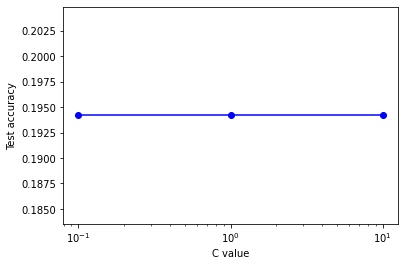

In [ ]:
# Reshape the input data to have only two dimensions
X_train = X_train.reshape((-1, 32 * 32 * 3))
X_test = X_test.reshape((-1, 32 * 32 * 3))

# Convert the target labels to a one-dimensional array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define a list of C values to try
C_values = [0.1, 1, 10]

# Train and evaluate the SVM for each C value
test_accuracies = []
for C in C_values:
    # Create an SVC model
    svm = SVC(kernel="linear", C=C, max_iter=50, tol=1e-3)

    # Train the model on the training data
    svm.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(test_accuracy)

    print(f"C = {C}: test accuracy = {test_accuracy:.4f}")

# Plot the test accuracies as a function of C
plt.plot(C_values, test_accuracies, 'bo-')
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Test accuracy')
plt.show()


In [ ]:
from keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reshape the input data to have only two dimensions
X_train = X_train.reshape((-1, 32 * 32 * 3))
X_test = X_test.reshape((-1, 32 * 32 * 3))

# Convert the target labels to a one-dimensional array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Train the model on the training data
logreg.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = logreg.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


170498071/170498071 [==============================] - 3s 0us/step
Test accuracy: 0.4024


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
